In [1]:
import os
from dotenv import load_dotenv
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest
from alpaca.data.timeframe import TimeFrame
import datetime as dt
import matplotlib.pyplot as plt
import vectorbt as vbt

In [2]:
load_dotenv()
API_KEY = os.getenv('API_KEY')
SECRET_KEY = os.getenv('SECRET_KEY')

# Connect to Alpaca Market Data API and create request
data_client = StockHistoricalDataClient(API_KEY, SECRET_KEY)

request_params = StockBarsRequest(
    symbol_or_symbols=["SPY"],
    timeframe=TimeFrame.Minute,
    start="2022-01-01"
)

bars = data_client.get_stock_bars(request_params)
data = bars.df
print("Successfully fetched historical data for SPY:\n")
data.tail()

Successfully fetched historical data for SPY:



open      high      low   close  \
symbol timestamp                                                        
SPY    2025-12-02 16:16:00+00:00  681.3500  681.8600  681.275  681.70   
       2025-12-02 16:17:00+00:00  681.6965  681.8200  681.420  681.45   
       2025-12-02 16:18:00+00:00  681.4500  681.6297  681.220  681.52   
       2025-12-02 16:19:00+00:00  681.5400  681.6000  681.030  681.44   
       2025-12-02 16:20:00+00:00  681.4400  681.6900  681.180  681.63   

                                    volume  trade_count        vwap  
symbol timestamp                                                     
SPY    2025-12-02 16:16:00+00:00  254123.0       2901.0  681.604723  
       2025-12-02 16:17:00+00:00  127479.0       2181.0  681.651692  
       2025-12-02 16:18:00+00:00  105903.0       1743.0  681.441950  
       2025-12-02 16:19:00+00:00  188809.0       2801.0  681.276627  
       2025-12-02 16:20:00+00:00  164790.0       2523.0  681.461622

In [3]:
# data.reset_index(inplace=True)
data.index = data.index.droplevel(0)
data.sort_index()
data

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2022-01-03 09:00:00+00:00,476.3800,476.9200,476.380,476.67,7790.0,68.0,476.689224
2022-01-03 09:01:00+00:00,476.6700,476.6700,476.670,476.67,116.0,7.0,476.670000
2022-01-03 09:02:00+00:00,476.6300,476.6300,476.600,476.60,410.0,13.0,476.614286
2022-01-03 09:03:00+00:00,476.5800,476.5800,476.480,476.56,708.0,17.0,476.537500
2022-01-03 09:04:00+00:00,476.5000,476.5600,476.500,476.56,402.0,10.0,476.530000
...,...,...,...,...,...,...,...
2025-12-02 16:16:00+00:00,681.3500,681.8600,681.275,681.70,254123.0,2901.0,681.604723
2025-12-02 16:17:00+00:00,681.6965,681.8200,681.420,681.45,127479.0,2181.0,681.651692
2025-12-02 16:18:00+00:00,681.4500,681.6297,681.220,681.52,105903.0,1743.0,681.441950


In [4]:
data['typical_price'] = (data['close'] + data['high'] + data['low']) / 3
data['dollar_volume'] = data['typical_price'] * data['volume']
data['date'] = data.index.date

# Cumulative sums (resetting every day)
data['cum_dollar_vol'] = data.groupby('date')['dollar_volume'].cumsum()
data['cum_vol'] = data.groupby('date')['volume'].cumsum()
data['vwap_intraday'] = data['cum_dollar_vol'] / data['cum_vol']
data

,open,high,low,close,volume,trade_count,vwap,typical_price,dollar_volume,date,cum_dollar_vol,cum_vol,vwap_intraday
timestamp,,,,,,,,,,,,,
2022-01-03 09:00:00+00:00,476.3800,476.9200,476.380,476.67,7790.0,68.0,476.689224,476.656667,3.713155e+06,2022-01-03,3.713155e+06,7790.0,476.656667
2022-01-03 09:01:00+00:00,476.6700,476.6700,476.670,476.67,116.0,7.0,476.670000,476.670000,5.529372e+04,2022-01-03,3.768449e+06,7906.0,476.656862
2022-01-03 09:02:00+00:00,476.6300,476.6300,476.600,476.60,410.0,13.0,476.614286,476.610000,1.954101e+05,2022-01-03,3.963859e+06,8316.0,476.654552
2022-01-03 09:03:00+00:00,476.5800,476.5800,476.480,476.56,708.0,17.0,476.537500,476.540000,3.373903e+05,2022-01-03,4.301250e+06,9024.0,476.645564
2022-01-03 09:04:00+00:00,476.5000,476.5600,476.500,476.56,402.0,10.0,476.530000,476.540000,1.915691e+05,2022-01-03,4.492819e+06,9426.0,476.641062
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-02 16:16:00+00:00,681.3500,681.8600,681.275,681.70,254123.0,2901.0,681.604723,681.611667,1.732132e+08,2025-12-02,1.273760e+10,18665146.0,682.426904
2025-12-02 16:17:00+00:00,681.6965,681.8200,681.420,681.45,127479.0,2181.0,681.651692,681.563333,8.688501e+07,2025-12-02,1.282448e+10,18792625.0,682.421046
2025-12-02 16:18:00+00:00,681.4500,681.6297,681.220,681.52,105903.0,1743.0,681.441950,681.456567,7.216829e+07,2025-12-02,1.289665e+10,18898528.0,682.415641


In [5]:
ROLLING_WINDOW = 20  # minutes
NUM_STD_DEV = 2

data["rolling_std_dev"] = data.groupby("date")["close"].transform(
    lambda x: x.rolling(ROLLING_WINDOW).std()
)
data["upper_band"] = data["vwap_intraday"] + (data["rolling_std_dev"] * NUM_STD_DEV)
data["lower_band"] = data["vwap_intraday"] - (data["rolling_std_dev"] * NUM_STD_DEV)

data

,open,high,low,close,volume,trade_count,vwap,typical_price,dollar_volume,date,cum_dollar_vol,cum_vol,vwap_intraday,rolling_std_dev,upper_band,lower_band
timestamp,,,,,,,,,,,,,,,,
2022-01-03 09:00:00+00:00,476.3800,476.9200,476.380,476.67,7790.0,68.0,476.689224,476.656667,3.713155e+06,2022-01-03,3.713155e+06,7790.0,476.656667,NaN,NaN,NaN
2022-01-03 09:01:00+00:00,476.6700,476.6700,476.670,476.67,116.0,7.0,476.670000,476.670000,5.529372e+04,2022-01-03,3.768449e+06,7906.0,476.656862,NaN,NaN,NaN
2022-01-03 09:02:00+00:00,476.6300,476.6300,476.600,476.60,410.0,13.0,476.614286,476.610000,1.954101e+05,2022-01-03,3.963859e+06,8316.0,476.654552,NaN,NaN,NaN
2022-01-03 09:03:00+00:00,476.5800,476.5800,476.480,476.56,708.0,17.0,476.537500,476.540000,3.373903e+05,2022-01-03,4.301250e+06,9024.0,476.645564,NaN,NaN,NaN
2022-01-03 09:04:00+00:00,476.5000,476.5600,476.500,476.56,402.0,10.0,476.530000,476.540000,1.915691e+05,2022-01-03,4.492819e+06,9426.0,476.641062,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-02 16:16:00+00:00,681.3500,681.8600,681.275,681.70,254123.0,2901.0,681.604723,681.611667,1.732132e+08,2025-12-02,1.273760e+10,18665146.0,682.426904,0.813280,684.053465,680.800343
2025-12-02 16:17:00+00:00,681.6965,681.8200,681.420,681.45,127479.0,2181.0,681.651692,681.563333,8.688501e+07,2025-12-02,1.282448e+10,18792625.0,682.421046,0.850505,684.122056,680.720036
2025-12-02 16:18:00+00:00,681.4500,681.6297,681.220,681.52,105903.0,1743.0,681.441950,681.456567,7.216829e+07,2025-12-02,1.289665e+10,18898528.0,682.415641,0.866020,684.147681,680.683601


In [6]:
data.dropna(subset=['upper_band'], inplace=True)
data

,open,high,low,close,volume,trade_count,vwap,typical_price,dollar_volume,date,cum_dollar_vol,cum_vol,vwap_intraday,rolling_std_dev,upper_band,lower_band
timestamp,,,,,,,,,,,,,,,,
2022-01-03 09:26:00+00:00,476.8400,476.8400,476.840,476.84,207.0,8.0,476.840000,476.840000,9.870588e+04,2022-01-03,1.142058e+07,23958.0,476.691710,0.123879,476.939469,476.443952
2022-01-03 09:27:00+00:00,476.8500,476.8500,476.850,476.85,149.0,8.0,476.850000,476.850000,7.105065e+04,2022-01-03,1.149163e+07,24107.0,476.692689,0.131880,476.956449,476.428928
2022-01-03 09:28:00+00:00,476.7600,476.7600,476.760,476.76,116.0,5.0,476.760000,476.760000,5.530416e+04,2022-01-03,1.154693e+07,24223.0,476.693011,0.133885,476.960782,476.425241
2022-01-03 09:30:00+00:00,476.8100,476.8100,476.740,476.74,770.0,11.0,476.770000,476.763333,3.671078e+05,2022-01-03,1.191404e+07,24993.0,476.695178,0.134188,476.963553,476.426802
2022-01-03 09:31:00+00:00,476.7900,476.8200,476.790,476.82,10026.0,28.0,476.813700,476.810000,4.780497e+06,2022-01-03,1.669454e+07,35019.0,476.728051,0.135759,476.999570,476.456533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-02 16:16:00+00:00,681.3500,681.8600,681.275,681.70,254123.0,2901.0,681.604723,681.611667,1.732132e+08,2025-12-02,1.273760e+10,18665146.0,682.426904,0.813280,684.053465,680.800343
2025-12-02 16:17:00+00:00,681.6965,681.8200,681.420,681.45,127479.0,2181.0,681.651692,681.563333,8.688501e+07,2025-12-02,1.282448e+10,18792625.0,682.421046,0.850505,684.122056,680.720036
2025-12-02 16:18:00+00:00,681.4500,681.6297,681.220,681.52,105903.0,1743.0,681.441950,681.456567,7.216829e+07,2025-12-02,1.289665e+10,18898528.0,682.415641,0.866020,684.147681,680.683601


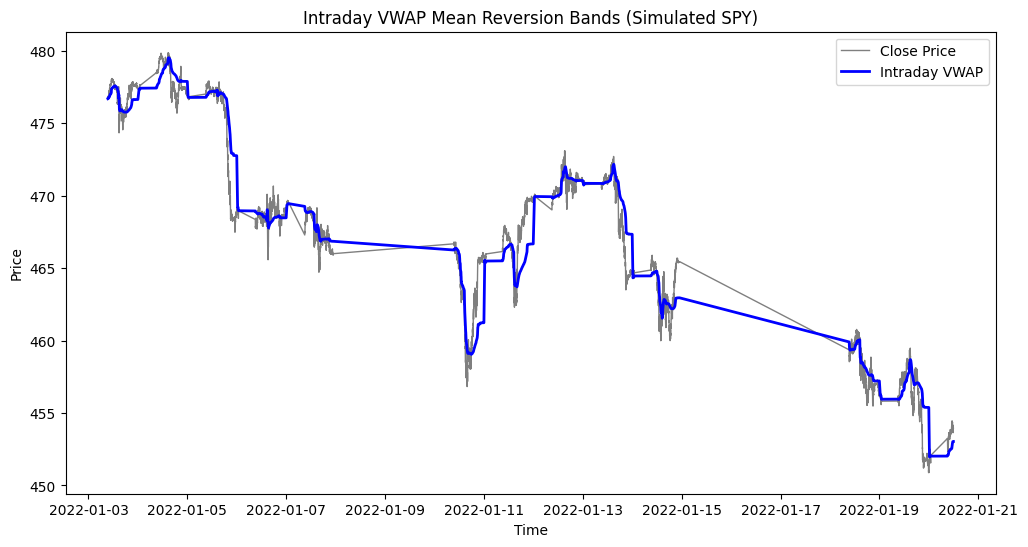

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(
    data.index[:1000],
    data["close"][:1000],
    label="Close Price",
    color="black",
    alpha=0.5,
    linewidth=1,
)
plt.plot(
    data.index[:1000],
    data["vwap_intraday"][:1000],
    label="Intraday VWAP",
    color="blue",
    linewidth=2,
)
plt.plot(
    data.index[:1000],
    data["upper_band"][:1000],
    label="Upper Band (+2σ)",
    color="red",
    linestyle="--",
    alpha=0.7,
)
plt.plot(
    data.index[:1000],
    data["lower_band"][:1000],
    label="Lower Band (-2σ)",
    color="green",
    linestyle="--",
    alpha=0.7,
)

plt.title('Intraday VWAP Mean Reversion Bands (Simulated SPY)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='best')

plt.show()

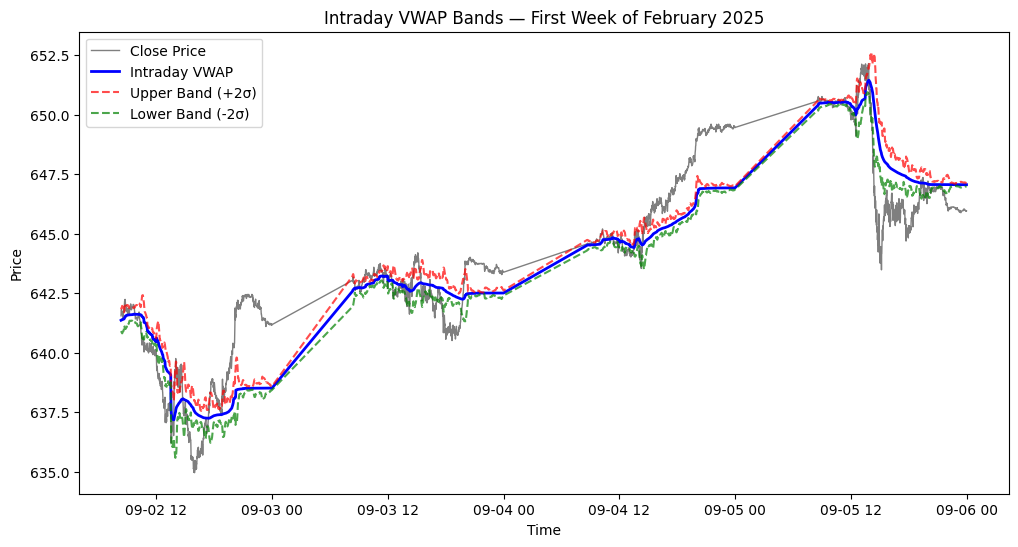

In [8]:
week_data = data["2025-09-01":"2025-09-06"]

plt.figure(figsize=(12, 6))

plt.plot(week_data.index, week_data["close"], label="Close Price", color="black", alpha=0.5, linewidth=1)
plt.plot(week_data.index, week_data["vwap_intraday"], label="Intraday VWAP", color="blue", linewidth=2)
plt.plot(week_data.index, week_data["upper_band"], label="Upper Band (+2σ)", color="red", linestyle="--", alpha=0.7)
plt.plot(week_data.index, week_data["lower_band"], label="Lower Band (-2σ)", color="green", linestyle="--", alpha=0.7)

plt.title("Intraday VWAP Bands — First Week of February 2025")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(loc="best")

plt.show()


C:\Users\Evan Schreiner\AppData\Local\Temp\ipykernel_26780\1528752268.py:12: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



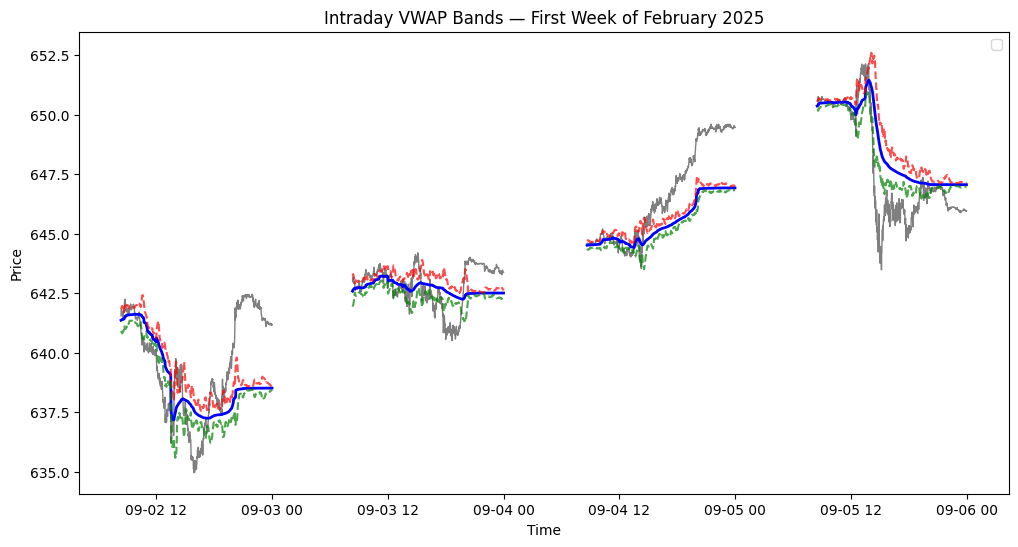

In [9]:
plt.figure(figsize=(12, 6))

for date, day_df in week_data.groupby(week_data.index.date):
    plt.plot(day_df.index, day_df["close"], color="black", alpha=0.5, linewidth=1)
    plt.plot(day_df.index, day_df["vwap_intraday"], color="blue", linewidth=2)
    plt.plot(day_df.index, day_df["upper_band"], color="red", linestyle="--", alpha=0.7)
    plt.plot(day_df.index, day_df["lower_band"], color="green", linestyle="--", alpha=0.7)

plt.title("Intraday VWAP Bands — First Week of February 2025")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(loc="best")

plt.show()


In [10]:
data['long_entry_signal'] = data['close'] < data['lower_band']
data['short_entry_signal'] = data['close'] > data['upper_band']
data['long_exit_signal'] = data['close'] >= data['vwap_intraday']
data['short_exit_signal'] = data['close'] <= data['vwap_intraday']

pf = vbt.Portfolio.from_signals(
    close=data['close'],
    entries=data['long_entry_signal'],
    exits=data['long_exit_signal'],
    short_entries=data['short_entry_signal'],
    short_exits=data['short_exit_signal'],
    freq="1min",
    init_cash=100_000
)

print(pf.stats())

Start                         2022-01-03 09:26:00+00:00
End                           2025-12-02 16:20:00+00:00
Period                                546 days 05:20:00
Start Value                                    100000.0
End Value                                 426317.888187
Total Return [%]                             326.317888
Benchmark Return [%]                           42.94732
Max Gross Exposure [%]                            100.0
Total Fees Paid                                     0.0
Max Drawdown [%]                              13.147357
Max Drawdown Duration                  48 days 17:03:00
Total Trades                                       9703
Total Closed Trades                                9703
Total Open Trades                                     0
Open Trade PnL                                      0.0
Win Rate [%]                                  77.213233
Best Trade [%]                                 2.501595
Worst Trade [%]                                -